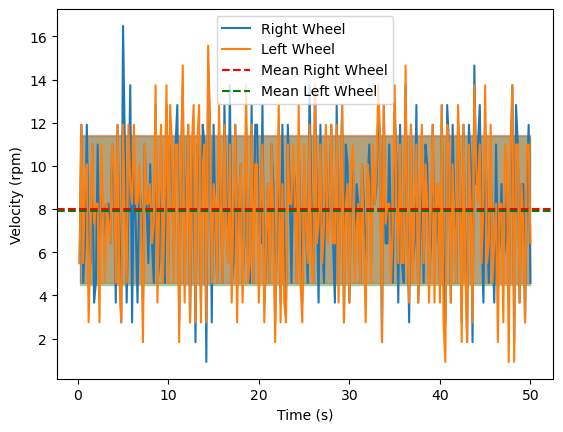

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Read in the data
df = pd.read_csv('/home/athimet/FRA532_Exam/src/pmzbbot_sensors/calibration/Experiment_1_10_id_1.csv')

#plot data

time = df['time']
right_wheel = df['left_wheel_vel']
left_wheel = df['right_wheel_vel']

# Convert to np array
time = np.array(time)
right_wheel = np.array(right_wheel)
left_wheel = np.array(left_wheel)

mean_right_wheel = np.mean(right_wheel)
mean_left_wheel = np.mean(left_wheel)

std_right_wheel = np.std(right_wheel)
std_left_wheel = np.std(left_wheel)

fig, ax = plt.subplots()
ax.plot(time, right_wheel, label='Right Wheel')
ax.plot(time, left_wheel, label='Left Wheel')
ax.axhline(mean_right_wheel, color='r', linestyle='--', label='Mean Right Wheel')
ax.axhline(mean_left_wheel, color='g', linestyle='--', label='Mean Left Wheel')
ax.fill_between(time, mean_right_wheel-std_right_wheel, mean_right_wheel+std_right_wheel, color='r', alpha=0.3)
ax.fill_between(time, mean_left_wheel-std_left_wheel, mean_left_wheel+std_left_wheel, color='g', alpha=0.3)

ax.legend()
plt.xlabel('Time (s)')
plt.ylabel('Velocity (rpm)')
plt.show()



In [58]:
data_path = '/home/athimet/FRA532_Exam/src/pmzbbot_sensors/calibration/'

def read_data(data_path, expr_num, rpm, id_num_range, base_df):
    

    for num in range(1, id_num_range):
        dpath = data_path + 'Experiment_' + str(expr_num) + '_' + str(rpm) + '_id_' + str(num) + '.csv'
        df = pd.read_csv(dpath)
        # Add the experiment rpm to the dataframe
        df['rpm'] = rpm
        # Concatenate the dataframes
        base_df = pd.concat([base_df, df], ignore_index=True)

    return base_df

In [59]:
base_df = pd.DataFrame(columns=['time', 'right_wheel_vel', 'left_wheel_vel'])

for rpm in range(10, 80, 10):
    base_df = read_data(data_path, 1, rpm, 3, base_df)

/tmp/ipykernel_127015/705643981.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  base_df = pd.concat([base_df, df], ignore_index=True)


In [60]:
# Remove time column
base_df = base_df.drop(columns=['time'])
base_df

,right_wheel_vel,left_wheel_vel,rpm
0,5.496000,5.496000,10.0
1,11.908000,11.908000,10.0
2,5.496000,4.580000,10.0
3,9.160000,6.412000,10.0
4,10.076000,11.908000,10.0
...,...,...,...
3495,70.531999,70.531999,70.0
3496,72.363996,72.363996,70.0
3497,67.783995,68.699996,70.0
3498,68.699996,67.783995,70.0


In [61]:
# true_rpm = np.arange(10, 80, 10)

# fig, ax = plt.subplots()
# ax.errorbar(true_rpm, right_wheel_mean_list, yerr=right_wheel_std_list, label='Right Wheel')
# ax.errorbar(true_rpm, left_wheel_mean_list, yerr=left_wheel_std_list, label='Left Wheel')
# ax.legend()
# plt.xlabel('True RPM')
# plt.ylabel('Velocity (rpm)')
# plt.show()

Right Wheel: Slope = 1.03, Intercept = -2.29
Left Wheel: Slope = 1.02, Intercept = -2.20


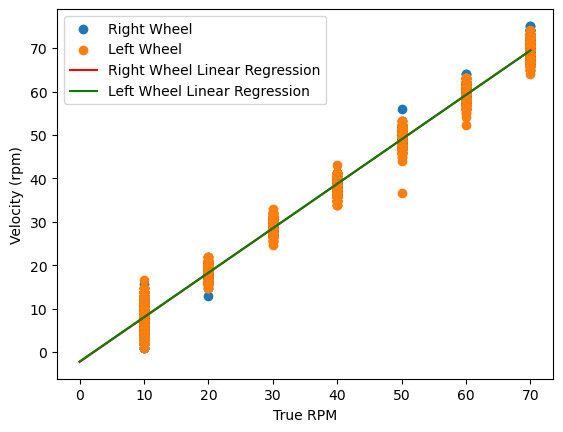

In [62]:
# Fine Linear Regression

from sklearn.linear_model import LinearRegression

# Create the model for the right wheel
model_right = LinearRegression()
X = base_df['rpm'].values.reshape(-1, 1)
y = base_df['right_wheel_vel']

model_right.fit(X, y)

# Get the model parameters
right_slope = model_right.coef_
right_intercept = model_right.intercept_

# Create the model for the left wheel
model_left = LinearRegression()
X = base_df['rpm'].values.reshape(-1, 1)
y = base_df['left_wheel_vel']

model_left.fit(X, y)

# Get the model parameters
left_slope = model_left.coef_
left_intercept = model_left.intercept_


print(f'Right Wheel: Slope = {right_slope[0]:.2f}, Intercept = {right_intercept:.2f}')
print(f'Left Wheel: Slope = {left_slope[0]:.2f}, Intercept = {left_intercept:.2f}')


# Linear Regression function for the right wheel
def right_wheel_rpm(rpm, slope, intercept):
    return slope * rpm + intercept

# Linear Regression function for the left wheel
def left_wheel_rpm(rpm, slope, intercept):
    return slope * rpm + intercept

# Plot the linear regression
fig, ax = plt.subplots()
ax.scatter(base_df['rpm'], base_df['right_wheel_vel'], label='Right Wheel')
ax.scatter(base_df['rpm'], base_df['left_wheel_vel'], label='Left Wheel')
# Plot the linear regression
x = np.arange(0, 80, 10)
y = right_wheel_rpm(x, right_slope, right_intercept)
ax.plot(x, y, label='Right Wheel Linear Regression', color='r')
y = left_wheel_rpm(x, left_slope, left_intercept)
ax.plot(x, y, label='Left Wheel Linear Regression', color='g')
ax.legend()
plt.xlabel('True RPM')
plt.ylabel('Velocity (rpm)')
plt.show()


In [63]:
# Get Inverse of the Linear Regression
def inverse_right_wheel_rpm(vel, slope, intercept):
    return (vel - intercept) / slope

def inverse_left_wheel_rpm(vel, slope, intercept):
    return (vel - intercept) / slope


# Test the inverse function
vel = 15
print(f'Right Wheel: RPM = {inverse_right_wheel_rpm(vel, right_slope[0], right_intercept):.2f}')
print(f'Left Wheel: RPM = {inverse_left_wheel_rpm(vel, left_slope[0], left_intercept):.2f}')

# Print slope and intercept
print(f'Right Wheel: Slope = {right_slope[0]:.6f}, Intercept = {right_intercept:.6f}')
print(f'Left Wheel: Slope = {left_slope[0]:.6f}, Intercept = {left_intercept:.6f}')


Right Wheel: RPM = 16.86
Left Wheel: RPM = 16.80
Right Wheel: Slope = 1.025501, Intercept = -2.285550
Left Wheel: Slope = 1.023715, Intercept = -2.195521


In [72]:
tarrpm = 40

Right Wheel mean: 40.11, Left Wheel mean: 40.16


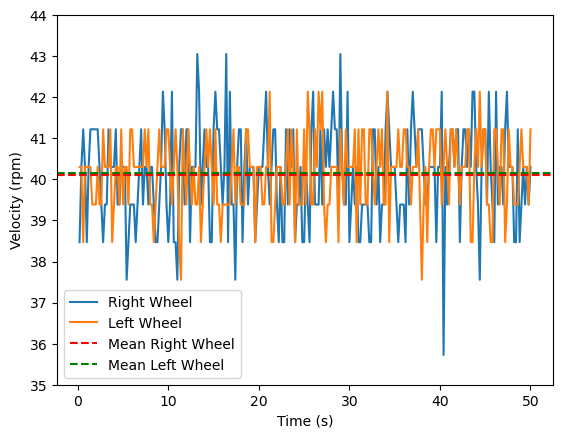

In [73]:
df = pd.read_csv(f'/home/athimet/FRA532_Exam/src/pmzbbot_sensors/calibration/Experiment_1_{tarrpm}_id_99.csv')

#Plot df Data
time = df['time']
right_wheel = df['left_wheel_vel']
left_wheel = df['right_wheel_vel']

# Convert to np array
time = np.array(time)
right_wheel = np.array(right_wheel)
left_wheel = np.array(left_wheel)

# Calculate Mean
mean_right_wheel = np.mean(right_wheel)
mean_left_wheel = np.mean(left_wheel)

# Plot the data
fig, ax = plt.subplots()
ax.plot(time, right_wheel, label='Right Wheel')
ax.plot(time, left_wheel, label='Left Wheel')
ax.axhline(mean_right_wheel, color='r', linestyle='--', label='Mean Right Wheel')
ax.axhline(mean_left_wheel, color='g', linestyle='--', label='Mean Left Wheel')
ax.legend()
plt.yticks(np.arange(tarrpm-5,tarrpm+5,1))
plt.xlabel('Time (s)')
plt.ylabel('Velocity (rpm)')

print(f'Right Wheel mean: {mean_right_wheel:.2f}, Left Wheel mean: {mean_left_wheel:.2f}')


Right Wheel mean: 38.28, Left Wheel mean: 38.13


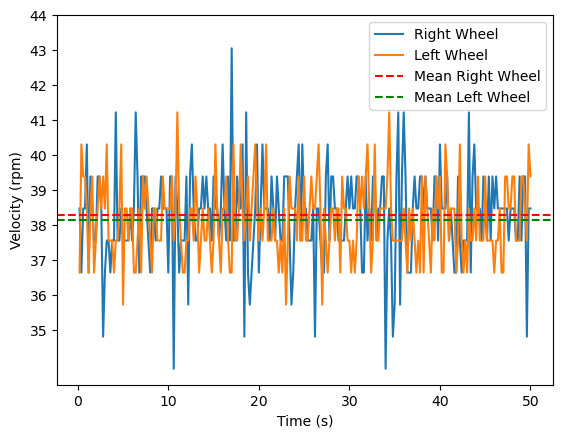

In [74]:
df = pd.read_csv(f'/home/athimet/FRA532_Exam/src/pmzbbot_sensors/calibration/Experiment_1_{tarrpm}_id_2.csv')

#Plot df Data
time = df['time']
right_wheel = df['left_wheel_vel']
left_wheel = df['right_wheel_vel']

# Convert to np array
time = np.array(time)
right_wheel = np.array(right_wheel)
left_wheel = np.array(left_wheel)

# Calculate Mean
mean_right_wheel = np.mean(right_wheel)
mean_left_wheel = np.mean(left_wheel)

# Plot the data
fig, ax = plt.subplots()
ax.plot(time, right_wheel, label='Right Wheel')
ax.plot(time, left_wheel, label='Left Wheel')
ax.axhline(mean_right_wheel, color='r', linestyle='--', label='Mean Right Wheel')
ax.axhline(mean_left_wheel, color='g', linestyle='--', label='Mean Left Wheel')
ax.legend()
plt.yticks(np.arange(tarrpm-5,tarrpm+5,1))
plt.xlabel('Time (s)')
plt.ylabel('Velocity (rpm)')

print(f'Right Wheel mean: {mean_right_wheel:.2f}, Left Wheel mean: {mean_left_wheel:.2f}')